# Authors

Addison Byers
Cameron Colaneri
Collin Campbell
Ethan Brown

# Home Loan Dataset

We chose this dataset because of its high usability score, low amounts of missing data, and because we were interested in seeing what makes an applicant likely to receive their home loan.

In [2]:
# code block
# read data set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Getting the data imported into pandas

data = pd.read_csv("./data/loan_sanction_train.csv")

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# normalize/codify data set.
# Scale the data, but maybe make it a copy rather than overwrite the normalized data. KNN depends on the scaled features.
# add another column saying whether or not missing data was present in the data
data["Missing_Data"] = np.zeros(shape=(614, 1))

# if null make 1 for missing data row
for i in range(len(data)):
  empty_check = data.loc[i].isna().any()
  if empty_check:
    data.loc[i, "Missing_Data"] = 1.0


# Cleaning the data #
data["Gender"] = data["Gender"].fillna("Male")
data["Married"] = data["Married"].fillna("No")
data["Dependents"] = data["Dependents"].fillna("0")
data["Self_Employed"] = data["Self_Employed"].fillna("No")
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].median())
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].median())
data["Credit_History"] = data["Credit_History"].fillna("1")


# Remove the Loan_ID Column
data = data.drop(columns="Loan_ID")

# making gender a normalization
male = data['Gender'].value_counts(normalize=True)['Male']

data_gender_normalized = data['Gender'].map({'Male': male, 'Female': 1 - male, "NaN": male})

data['Gender'] = data_gender_normalized

# normalizing education
education = data['Education'].value_counts(normalize=True)["Graduate"]

data_education_normalized = data['Education'].map({'Graduate': education, 'Not Graduate': 1 - education})

data['Education'] = data_education_normalized

# normalizing self_employed
self_employed = data['Self_Employed'].value_counts(normalize=True)["Yes"]

data_selfEmp_normalized = data['Self_Employed'].map({"Yes": self_employed, "No": 1-self_employed})

data["Self_Employed"] = data_selfEmp_normalized

# normalzing property area
area_property = data["Property_Area"].value_counts(normalize=True)

data_area_normalized = data["Property_Area"].map({"Urban": area_property["Urban"], "Semiurban": area_property['Semiurban'], "Rural": area_property["Rural"]})

data["Property_Area"] = data_area_normalized

# normalzing married 
married = data["Married"].value_counts(normalize=True)["Yes"]

married_normalized = data["Married"].map({"Yes": married, "No": 1-married})

data["Married"] = married_normalized

# applicant income normalized
data["ApplicantIncome"] /= data["ApplicantIncome"].abs().max()

# applicant income normalized
data["CoapplicantIncome"] /= data["CoapplicantIncome"].abs().max()

data["LoanAmount"] /= data["LoanAmount"].abs().max()

data["Loan_Amount_Term"] /= data["Loan_Amount_Term"].abs().max()

# Switchin loan status to 0 or 1
data["Loan_Status"] = data["Loan_Status"].map({"Y": 1, "N": 0})

# Cleaning the dependents
data["Dependents"] = data["Dependents"].map({"0":0, "1":1, "2":2, "3+": 3})

data["Dependents"] /= data["Dependents"].abs().max()

def ratio(a, b):
  return b/a

data['WealthToLoanRatio'] = data.apply(lambda row : ratio(row['ApplicantIncome'], row['LoanAmount']), axis = 1)

data["WealthToLoanRatio"] /= data["WealthToLoanRatio"].abs().max()



data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Missing_Data,WealthToLoanRatio
0,0.81759,0.351792,0.000000,0.781759,0.86645,0.072210,0.000000,0.182857,0.750,1.0,0.328990,1,1.0,0.024316
1,0.81759,0.648208,0.333333,0.781759,0.86645,0.056580,0.036192,0.182857,0.750,1.0,0.291531,0,0.0,0.031033
2,0.81759,0.648208,0.000000,0.781759,0.13355,0.037037,0.000000,0.094286,0.750,1.0,0.328990,1,0.0,0.024444
3,0.81759,0.648208,0.000000,0.218241,0.86645,0.031889,0.056592,0.171429,0.750,1.0,0.328990,1,0.0,0.051620
4,0.81759,0.351792,0.000000,0.781759,0.86645,0.074074,0.000000,0.201429,0.750,1.0,0.328990,1,0.0,0.026111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.18241,0.351792,0.000000,0.781759,0.86645,0.035802,0.000000,0.101429,0.750,1.0,0.291531,1,0.0,0.027203
610,0.81759,0.648208,1.000000,0.781759,0.86645,0.050691,0.000000,0.057143,0.375,1.0,0.291531,1,0.0,0.010824
611,0.81759,0.648208,0.333333,0.781759,0.86645,0.099654,0.005760,0.361429,0.750,1.0,0.328990,1,0.0,0.034825
612,0.81759,0.648208,0.666667,0.781759,0.86645,0.093617,0.000000,0.267143,0.750,1.0,0.328990,1,0.0,0.027400


# Why Scale the Data

Something about KNN here

In [ ]:
# First Model

In [ ]:
# Graphs

# Observations



This model using logistic regression, with a 10% 90% split. Overall gave us a 87% accuracy, 87% precision, and 98% recall.

In [5]:
data_train = data.loc[:, data.columns != "Loan_Status"]
data_target = data["Loan_Status"]
# Second Model (linear regression 90 10 split)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_train.to_numpy(), data_target.to_numpy(), test_size=0.1, random_state=0)

from sklearn.linear_model import LogisticRegression

LogisticReg = LogisticRegression(solver='lbfgs', max_iter=1000)

LogisticReg.fit(x_train, y_train)

print(LogisticReg.coef_)

predictions = LogisticReg.predict(x_test)

[[-0.11890157  1.10135549  0.22672849  0.52526014 -0.02577367  0.09216964
  -0.86597211 -0.67046189 -0.27150918  3.28515029  0.96796162 -0.07218687
  -0.80706628]]


In [6]:
# Output data, showing what was predicted wrong, this shows that the logistic regression severly classifies on whether or not there is credit history.
from sklearn import metrics
score = LogisticReg.score(x_test, y_test)
print(score)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

for i in range(len(predictions)):
    if y_test[i] != predictions[i]:
        data_info = x_test[i].reshape(1, 13)
        df = pd.DataFrame(data_info, columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',  'Missing_Data', 'WealthToLoanRatio'], index=['1'])
        print(f"Actual: {y_test[i]}, predicted {predictions[i]}")
        print(f"{df}", end="\n\n\n")

print(metrics.classification_report(y_test, predictions))

0.8709677419354839
[[ 8  7]
 [ 1 46]]
Actual: 0, predicted 1
    Gender   Married Dependents Education Self_Employed ApplicantIncome  \
1  0.18241  0.351792        0.0  0.781759       0.86645        0.052222   

  CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History Property_Area  \
1               0.0       0.16             0.75            1.0      0.379479   

  Missing_Data WealthToLoanRatio  
1          0.0          0.029419  


Actual: 0, predicted 1
    Gender   Married Dependents Education Self_Employed ApplicantIncome  \
1  0.81759  0.648208        0.0  0.781759       0.86645        0.053494   

  CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History Property_Area  \
1          0.058824   0.157143             0.75            1.0       0.32899   

  Missing_Data WealthToLoanRatio  
1          0.0          0.028207  


Actual: 0, predicted 1
    Gender   Married Dependents Education Self_Employed ApplicantIncome  \
1  0.81759  0.648208   0.333333  0.781759       0.

Text(0.5, 1.0, 'Accuracy Score: 0.8709677419354839')

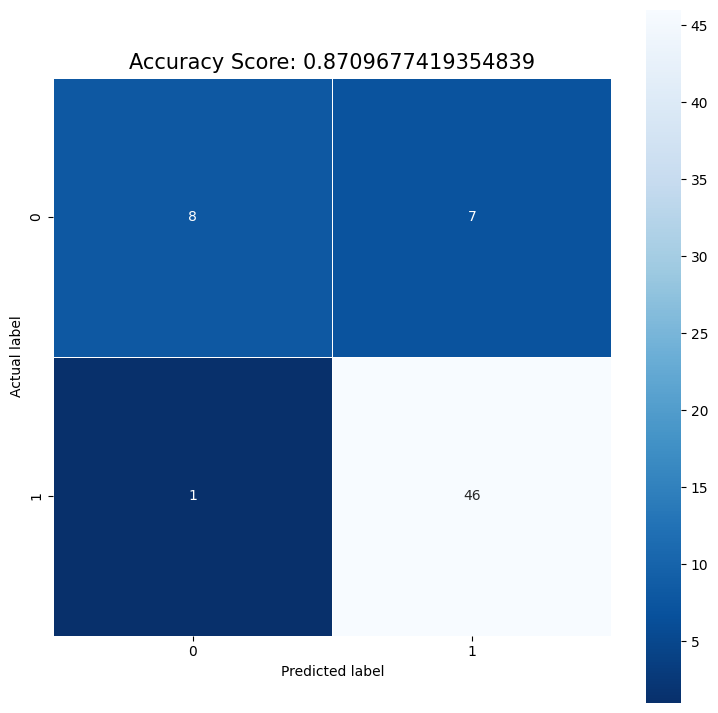

In [7]:
# A confusion matrix given the above report, the code was was almost directly copied from https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

# Observations



This model is also logistic regression but using a leave one out cross validation split. Using the data_train and data_target that was defined in the last model. This model had a lower accuracy than the 90% 10% split at 81%, a lower precision than the previous model at 79%, but still a great recall similar to the previous model at 98%. I belive that LOO is worse at classicification that the 90% 10% split beacause of the weight assigned to credit history. The additional ~90 data points that LOO has might give the credit history feature weight a heavier weight. Meaning those who still got approved but had no credit history, the model would have a higher likelyhood of predicting no given the other features, making LOO less accurate. 

In [8]:
# Third Model (logistic regression - LOO)
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

cv = LeaveOneOut()

scores = cross_val_predict(LogisticReg, data_train, data_target, cv=cv, n_jobs=1)

scores_yes = np.count_nonzero(scores == 1)

In [9]:
# Output data, showing what was predicted wrong, this shows that the logistic regression severly classifies on whether or not there is credit history.
true_negative = 0
true_positive = 0
false_positive = 0
false_negative = 0
for i in range(len(scores)):
    if scores[i] ==  0 and data.iloc[i]["Loan_Status"] == 0:
        true_negative += 1
    elif scores[i] == 1 and data.iloc[i]["Loan_Status"] == 1:
        true_positive += 1
    elif scores[i] == 0 and data.iloc[i]["Loan_Status"] == 1:
        false_negative += 1
        print(f"Actual: 1, predicted: 0\n{data.iloc[i]}", end="\n\n")
    elif scores[i] == 1 and data.iloc[i]["Loan_Status"] == 0:
        false_positive += 1
        #print(f"Actual: 0, predicted: 1\n{data.iloc[i]}", end="\n\n")
        
        
acc_loo = (true_positive + true_negative)/len(scores)

print(f"Accuracy: {acc_loo}")
print(f"Precision {(true_positive/(true_positive+false_positive))}") 
print(f"Recall: {true_positive/(true_positive+false_negative)}")    

print(metrics.classification_report(data["Loan_Status"], scores))

Actual: 1, predicted: 0
Gender                0.18241
Married              0.351792
Dependents                0.0
Education            0.781759
Self_Employed         0.86645
ApplicantIncome      0.026383
CoapplicantIncome    0.215518
LoanAmount           0.195714
Loan_Amount_Term         0.75
Credit_History            0.0
Property_Area        0.379479
Loan_Status                 1
Missing_Data              0.0
WealthToLoanRatio    0.071232
Name: 122, dtype: object

Actual: 1, predicted: 0
Gender                0.81759
Married              0.648208
Dependents                1.0
Education            0.781759
Self_Employed         0.86645
ApplicantIncome      0.493815
CoapplicantIncome         0.0
LoanAmount           0.857143
Loan_Amount_Term        0.375
Credit_History            0.0
Property_Area        0.379479
Loan_Status                 1
Missing_Data              0.0
WealthToLoanRatio    0.016667
Name: 155, dtype: object

Actual: 1, predicted: 0
Gender                0.81759
Marrie

Text(0.5, 1.0, 'Accuracy Score: 0.8094462540716613')

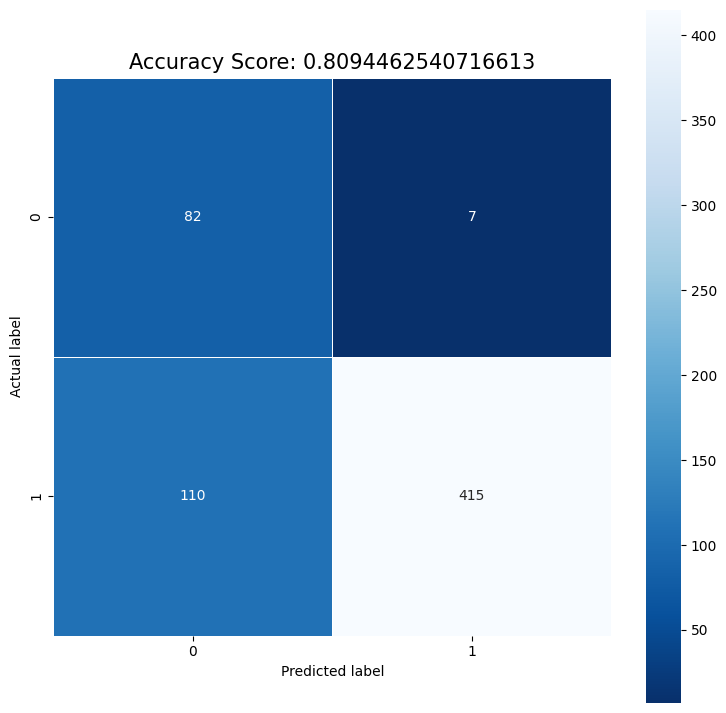

In [10]:
# A confusion matrix given the above report, the code was was almost directly copied from https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
cm_loo = metrics.confusion_matrix(scores, data_target)

plt.figure(figsize=(9,9))
sns.heatmap(cm_loo, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f"Accuracy Score: {acc_loo}"
plt.title(all_sample_title, size = 15)

# Observations



In [ ]:
# Fourth Model

In [ ]:
# Graphs

# Observations

